In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib as plt
import folium
import pyproj
from shapely.geometry import Point, Polygon, LineString

# Load Si, Dong

In [2]:
si = gpd.read_file('../CTPRVN_20220324/ctp_rvn.shp', encoding = 'euc-kr')
si = si.to_crs(epsg=4326)

si = si[si['CTP_ENG_NM'] == 'Seoul']

si

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry
0,11,Seoul,서울특별시,"POLYGON ((127.12667 37.46863, 127.12667 37.468..."


In [3]:
gu = gpd.read_file('../SIG_202302/sig.shp', encoding = 'euc-kr')
gu = gu.set_crs(epsg=5179)
gu = gu.to_crs(epsg=4326)
gu = gu[:25]
gu

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"POLYGON ((127.00864 37.58047, 127.00871 37.580..."
1,11140,Jung-gu,중구,"POLYGON ((127.02314 37.57196, 127.02336 37.571..."
2,11170,Yongsan-gu,용산구,"POLYGON ((126.96918 37.55566, 126.96917 37.554..."
3,11200,Seongdong-gu,성동구,"POLYGON ((127.04341 37.57234, 127.04524 37.571..."
4,11215,Gwangjin-gu,광진구,"POLYGON ((127.10166 37.57240, 127.10224 37.572..."
5,11230,Dongdaemun-gu,동대문구,"POLYGON ((127.07108 37.60732, 127.07117 37.606..."
6,11260,Jungnang-gu,중랑구,"POLYGON ((127.11131 37.62069, 127.11214 37.620..."
7,11290,Seongbuk-gu,성북구,"POLYGON ((127.01059 37.58025, 127.01030 37.580..."
8,11305,Gangbuk-gu,강북구,"POLYGON ((127.00457 37.68508, 127.00553 37.684..."
9,11320,Dobong-gu,도봉구,"POLYGON ((127.01509 37.64929, 127.01477 37.649..."


In [5]:
dong = gpd.read_file("../EMD_20220324/emd.shp", encoding = 'euc-kr')
dong = dong.to_crs(epsg=4326)
        
dong = dong[:467]
dong.tail()

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
462,11740106,Dunchon-dong,둔촌동,"POLYGON ((127.15669 37.53756, 127.15654 37.537..."
463,11740107,Amsa-dong,암사동,"POLYGON ((127.14353 37.55490, 127.14343 37.554..."
464,11740108,Seongnae-dong,성내동,"POLYGON ((127.13424 37.53556, 127.13423 37.535..."
465,11740109,Cheonho-dong,천호동,"POLYGON ((127.14153 37.55080, 127.14154 37.550..."
466,11740110,Gangil-dong,강일동,"POLYGON ((127.17030 37.56240, 127.17030 37.562..."


In [357]:
m = folium.Map(location = [37.5758772,126.9768121], zoom_start=12)
m.save('seoul_map.html')

for _, r in dong.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,style_function=lambda x: {'fillColor': 'green'})

    lat = r['geometry'].centroid.y
    lon = r['geometry'].centroid.x
    #folium.Marker(location=[lat, lon], popup='{}'.format(r['EMD_KOR_NM'])).add_to(m)

    geo_j.add_to(m)
m

# Load Road

In [19]:
road = gpd.read_file('../Z_KAIS_TL_SPRD_MANAGE_11000/Z_KAIS_TL_SPRD_MANAGE_11000.shp', encoding = 'euc-kr')

In [20]:
road.head()

,ALWNC_DE,ALWNC_RESN,BSI_INT,ENG_RN,MVMN_DE,MVMN_RESN,MVM_RES_CD,NTFC_DE,OPERT_DE,RBP_CN,...,RDS_MAN_NO,REP_CN,RN,RN_CD,ROAD_BT,ROAD_LT,ROA_CLS_SE,SIG_CD,WDR_RD_CD,geometry
0,20100605,용마공원로에서 분기되는 도로구간으로 일련번호부여,8,Yongmagongwon-ro 4-gil,20181213,도로구간변경,12,20100610,20181213150729,망우동 408-1,...,1518,망우동 412-49,용마공원로4길,4118463,2.0,21.0,4,11260,3,"LINESTRING (208869.824 454864.254, 208888.820 ..."
1,20100419,중랑천의 옛 이름인 한천에서 유래,10,Hancheon-ro,20100910,"광역도로 정비 및 부여사유, 부여방식 정비",90,20100422,20141030220124,석관동 42-12대,...,409,장위동 311-42 천,한천로,3005038,2.0,11840.0,3,11290,2,"LINESTRING (205126.997 457288.152, 205123.562 ..."
2,20100617,경희대로에서 분기된 도로구간으로 순차적으로 일련번호 부여,10,Kyungheedae-ro 1-gil,None,직권수정(속성변경),99,20100617,20190607163749,회기동 16-61,...,5,회기동 60-90,경희대로1길,4115019,6.0,109.0,4,11230,3,"LINESTRING (204570.753 454685.702, 204583.290 ..."
3,20100617,홍릉로에서 분기된 도로구간으로 순차적으로 일련번호 부여,10,Hongneung-ro 1ga-gil,None,직권수정(속성변경),99,20100617,20190507100911,제기동 632-20,...,2942,제기동 575-2,홍릉로1가길,4115654,1.0,31.0,4,11230,3,"LINESTRING (203722.326 453424.336, 203700.572 ..."
4,20100514,장위로에서 분기되는 도로구간으로 해당 일련번호 부여,10,Jangwi-ro 40-gil,20130528,"광역도로 정비 및 부여사유, 부여방식 정비",90,20100610,20130528203251,장위동 74-5대,...,1560,장위동 66-294대,장위로40길,4121578,5.0,12.0,4,11290,3,"LINESTRING (204587.026 457063.735, 204590.052 ..."


In [21]:
road_crs = road.to_crs("EPSG:4326")
print(road_crs.shape)

road_crs.head()

(67042, 21)


,ALWNC_DE,ALWNC_RESN,BSI_INT,ENG_RN,MVMN_DE,MVMN_RESN,MVM_RES_CD,NTFC_DE,OPERT_DE,RBP_CN,...,RDS_MAN_NO,REP_CN,RN,RN_CD,ROAD_BT,ROAD_LT,ROA_CLS_SE,SIG_CD,WDR_RD_CD,geometry
0,20100605,용마공원로에서 분기되는 도로구간으로 일련번호부여,8,Yongmagongwon-ro 4-gil,20181213,도로구간변경,12,20100610,20181213150729,망우동 408-1,...,1518,망우동 412-49,용마공원로4길,4118463,2.0,21.0,4,11260,3,"LINESTRING (127.10043 37.59330, 127.10065 37.5..."
1,20100419,중랑천의 옛 이름인 한천에서 유래,10,Hancheon-ro,20100910,"광역도로 정비 및 부여사유, 부여방식 정비",90,20100422,20141030220124,석관동 42-12대,...,409,장위동 311-42 천,한천로,3005038,2.0,11840.0,3,11290,2,"LINESTRING (127.05807 37.61517, 127.05803 37.6..."
2,20100617,경희대로에서 분기된 도로구간으로 순차적으로 일련번호 부여,10,Kyungheedae-ro 1-gil,None,직권수정(속성변경),99,20100617,20190607163749,회기동 16-61,...,5,회기동 60-90,경희대로1길,4115019,6.0,109.0,4,11230,3,"LINESTRING (127.05175 37.59172, 127.05190 37.5..."
3,20100617,홍릉로에서 분기된 도로구간으로 순차적으로 일련번호 부여,10,Hongneung-ro 1ga-gil,None,직권수정(속성변경),99,20100617,20190507100911,제기동 632-20,...,2942,제기동 575-2,홍릉로1가길,4115654,1.0,31.0,4,11230,3,"LINESTRING (127.04214 37.58036, 127.04189 37.5..."
4,20100514,장위로에서 분기되는 도로구간으로 해당 일련번호 부여,10,Jangwi-ro 40-gil,20130528,"광역도로 정비 및 부여사유, 부여방식 정비",90,20100610,20130528203251,장위동 74-5대,...,1560,장위동 66-294대,장위로40길,4121578,5.0,12.0,4,11290,3,"LINESTRING (127.05195 37.61315, 127.05199 37.6..."


In [11]:
road_crs['geometry'].head()

0    LINESTRING (127.10043 37.59330, 127.10065 37.5...
1    LINESTRING (127.05807 37.61517, 127.05803 37.6...
2    LINESTRING (127.05175 37.59172, 127.05190 37.5...
3    LINESTRING (127.04214 37.58036, 127.04189 37.5...
4    LINESTRING (127.05195 37.61315, 127.05199 37.6...
Name: geometry, dtype: geometry

In [22]:
road_crs['centroid'] = road_crs['geometry'].centroid
road_crs.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


,ALWNC_DE,ALWNC_RESN,BSI_INT,ENG_RN,MVMN_DE,MVMN_RESN,MVM_RES_CD,NTFC_DE,OPERT_DE,RBP_CN,...,REP_CN,RN,RN_CD,ROAD_BT,ROAD_LT,ROA_CLS_SE,SIG_CD,WDR_RD_CD,geometry,centroid
0,20100605,용마공원로에서 분기되는 도로구간으로 일련번호부여,8,Yongmagongwon-ro 4-gil,20181213,도로구간변경,12,20100610,20181213150729,망우동 408-1,...,망우동 412-49,용마공원로4길,4118463,2.0,21.0,4,11260,3,"LINESTRING (127.10043 37.59330, 127.10065 37.5...",POINT (127.10054 37.59326)
1,20100419,중랑천의 옛 이름인 한천에서 유래,10,Hancheon-ro,20100910,"광역도로 정비 및 부여사유, 부여방식 정비",90,20100422,20141030220124,석관동 42-12대,...,장위동 311-42 천,한천로,3005038,2.0,11840.0,3,11290,2,"LINESTRING (127.05807 37.61517, 127.05803 37.6...",POINT (127.05800 37.61521)
2,20100617,경희대로에서 분기된 도로구간으로 순차적으로 일련번호 부여,10,Kyungheedae-ro 1-gil,None,직권수정(속성변경),99,20100617,20190607163749,회기동 16-61,...,회기동 60-90,경희대로1길,4115019,6.0,109.0,4,11230,3,"LINESTRING (127.05175 37.59172, 127.05190 37.5...",POINT (127.05188 37.59220)
3,20100617,홍릉로에서 분기된 도로구간으로 순차적으로 일련번호 부여,10,Hongneung-ro 1ga-gil,None,직권수정(속성변경),99,20100617,20190507100911,제기동 632-20,...,제기동 575-2,홍릉로1가길,4115654,1.0,31.0,4,11230,3,"LINESTRING (127.04214 37.58036, 127.04189 37.5...",POINT (127.04199 37.58044)
4,20100514,장위로에서 분기되는 도로구간으로 해당 일련번호 부여,10,Jangwi-ro 40-gil,20130528,"광역도로 정비 및 부여사유, 부여방식 정비",90,20100610,20130528203251,장위동 74-5대,...,장위동 66-294대,장위로40길,4121578,5.0,12.0,4,11290,3,"LINESTRING (127.05195 37.61315, 127.05199 37.6...",POINT (127.05202 37.61317)


In [240]:
len(road_crs['RN'].unique())

14153

In [242]:
road_crs[road_crs['RN'] == "용마공원로4길"]

,ALWNC_DE,ALWNC_RESN,BSI_INT,ENG_RN,MVMN_DE,MVMN_RESN,MVM_RES_CD,NTFC_DE,OPERT_DE,RBP_CN,RDS_DPN_SE,RDS_MAN_NO,REP_CN,RN,RN_CD,ROAD_BT,ROAD_LT,ROA_CLS_SE,SIG_CD,WDR_RD_CD,geometry,centroid
0,20100605,용마공원로에서 분기되는 도로구간으로 일련번호부여,8,Yongmagongwon-ro 4-gil,20181213,도로구간변경,12,20100610,20181213150729,망우동 408-1,1,1518,망우동 412-49,용마공원로4길,4118463,2.0,21.0,4,11260,3,"LINESTRING (127.10043 37.59330, 127.10065 37.5...",POINT (127.10054 37.59326)
10,20100605,용마공원로에서 분기되는 도로구간으로 일련번호부여,10,Yongmagongwon-ro 4-gil,None,"광역도로 정비 및 부여사유, 부여방식 정비",90,20100610,20100928,망우동 408-1,1,1526,망우동 412-49,용마공원로4길,4118463,2.0,27.0,4,11260,3,"LINESTRING (127.10045 37.59334, 127.10017 37.5...",POINT (127.10031 37.59339)
22542,20100605,용마공원로에서 분기되는 도로구간으로 일련번호부여,11,Yongmagongwon-ro 4-gil,None,"광역도로 정비 및 부여사유, 부여방식 정비",90,20100610,20100928,망우동 408-1,0,307,망우동 412-49,용마공원로4길,4118463,5.0,247.0,4,11260,3,"LINESTRING (127.10109 37.59449, 127.10100 37.5...",POINT (127.10053 37.59347)
22988,20100605,용마공원로에서 분기되는 도로구간으로 일련번호부여,8,Yongmagongwon-ro 4-gil,None,"광역도로 정비 및 부여사유, 부여방식 정비",90,20100610,20100928,망우동 408-1,1,1523,망우동 412-49,용마공원로4길,4118463,2.0,16.0,4,11260,3,"LINESTRING (127.10076 37.59390, 127.10060 37.5...",POINT (127.10068 37.59393)


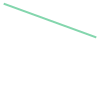

In [243]:
road_crs['geometry'][0]

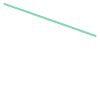

In [244]:
road_crs['geometry'][10]

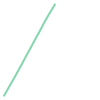

In [245]:
road_crs['geometry'][22542]

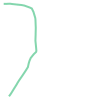

In [231]:
road_crs['geometry'][36229]

In [257]:
import random
m = folium.Map(location = [37.5758772,126.9768121], zoom_start=12)
i = 0

for _, r in dong.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,style_function=lambda x: {'fillColor': 'green'})

    lat = r['geometry'].centroid.y
    lon = r['geometry'].centroid.x
    folium.Marker(location=[lat, lon], popup='{}'.format(r['EMD_KOR_NM'])).add_to(m)

    geo_j.add_to(m)
    
for _, r in road_crs.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    
    if(i%10000 == 0):
        print(i)
        
    color = f'#{random.randrange(256**3):06x}'
    
    
    if(i%100000 == 36229 or i%100000 == 26990):
        geo_j = folium.GeoJson(data=geo_j,style_function=lambda x: {'fillColor': color})
        lat = r['centroid'].centroid.y
        lon = r['centroid'].centroid.x
        folium.Marker(location=[lat, lon], popup='{}'.format(r['RN'])).add_to(m)
        geo_j.add_to(m)    
    i = i + 1  


folium.Marker(location=[37.62000275, 127.0585632], popup='{}'.format("광운대학교 중앙도서관 따릉이 대여소")).add_to(m)
m.save('seoul_map_road.html')


0
10000
20000
30000
40000
50000
60000


# 따릉이 대여소가 무슨 구, 무슨 동에 속해있는지 체크

In [23]:
def getShortestDistanceRoad(point): #도로
    distances = road_crs.geometry.distance(point)
    return road_crs.iloc[distances.idxmin()]['RN'], distances.min(), distances.idxmin()

def getShortestDistanceRoad2(point): #중심점
    distances = road_crs.centroid.distance(point)
    return road_crs.iloc[distances.idxmin()]['RN'], distances.min(), distances.idxmin()

#getShortestDistanceRoad.apply(lambda x: getShortestDistanceRoad(x.geometry), axis = 1)
point = Point(127.0585632, 37.62000275) #광운대 중앙도서관 따릉이 대여소 좌표
print(getShortestDistanceRoad(point))
print(getShortestDistanceRoad2(point))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


('광운로', 0.00014589196623126515, 36229)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


('광운로7길', 0.0006513988330893372, 26990)


In [24]:
ddarung = pd.read_csv('../공공자전거대여소정보.csv', encoding = 'euc-kr')
ddarung['shortest_road'] = ""
ddarung

,대여소 번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치시기,LCD 거치대수,QR 거치대수,운영방식,shortest_road
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07,20.0,NaN,LCD,
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015-10-07,NaN,12.0,QR,
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,2015-10-07,NaN,8.0,QR,
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978332,2015-01-07,NaN,16.0,QR,
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015-10-07,NaN,11.0,QR,
...,...,...,...,...,...,...,...,...,...,...,...
2714,3698,명일역 3번출구 옆,강동구,강동구 명일동 303-7,37.551426,127.144211,2022-06-20,NaN,6.0,QR,
2715,3699,상일파출소 옆,강동구,강동구 상일동 520-1,37.556553,127.165878,2022-06-21,NaN,15.0,QR,
2716,3700,강변그대가리버뷰 입구 맞은편,강동구,강동구 천호동 250-7,37.548164,127.122574,2022-07-08,NaN,8.0,QR,
2717,3701,방아삼거리,강동구,강동구 둔촌동 118-2,37.523281,127.146133,2022-10-12,NaN,8.0,QR,


In [26]:
import warnings
warnings.filterwarnings(action='ignore')

for index, row in ddarung.iterrows():
    output = getShortestDistanceRoad2(Point(row['경도'], row['위도']))
    ddarung['shortest_road'][index] = output[0]
    
    print(str(index) + " " + row['보관소(대여소)명'] + " -> " + output[0])
    
ddarung

0  경복궁역 7번출구 앞 -> 사직로12길
1  경복궁역 4번출구 뒤 -> 사직로
2  광화문역 1번출구 앞 -> 세종대로23길
3  종로구청 옆 -> 종로1길
4  서울역사박물관 앞 -> 경희궁1길
5  광화문 S타워 앞 -> 덕수궁길
6  광화문역 6번출구 옆 B -> 세종대로21길
7  국립현대미술관 -> 삼청로2길
8  종각역 1번출구 앞 -> 종로7길
9  안국역 5번출구 앞 -> 율곡로
10  낙원상가 옆 -> 인사동4길
11  탑골공원 앞 -> 삼일대로20길
12  청계2가 사거리 옆 -> 청계천로
13  종로3가역 2번출구 뒤 -> 수표로22길
14  종로3가역 15번출구 앞 -> 종로18길
15  창경궁 입구 -> 창경궁로
16  세운스퀘어 앞 -> 창경궁로13길
17  종로4가 사거리 -> 종로
18  혜화동 로터리 -> 혜화로
19  혜화역 3번출구 뒤 -> 대학로
20  대학로 마로니에공원 -> 대학로
21  예일빌딩(율곡로) 앞 -> 율곡로
22  성균관대 E하우스 앞 -> 율곡로
23  서울보증보험본사 앞 -> 종로31가길
24  독립문역 사거리 -> 통일로
25  사직동주민센터 -> 사직로9가길
26  청운초교 앞 삼거리 -> 자하문로28길
27  중앙고입구 삼거리 -> 창덕궁길
28  재동초교 앞 삼거리 -> 북촌로5길
29  포르투갈 대사관 앞 -> 창덕궁1길
30  서울사대부속초교 앞 -> 율곡로
31  KT혜화지사 앞 -> 율곡로
32  성대입구 사거리 -> 창경궁로
33  원남동사거리 -> 창경궁로22길
34  동묘앞역 1번출구 뒤 -> 종로56길
35  청계8가 사거리 -> 난계로25길
36  신설동역 11번출구 뒤 -> 보문로1길
37  창신역 1번출구 앞 -> 지봉로
38  독립문역 3-1번출구 -> 통일로
39  SK 서린빌딩 앞 -> 종로
40  광화문 시민열린마당 -> 종로1길
41  종각역 5번출구 -> 청계천로
42  동성중학교 앞 -> 혜화로2길
43  동대문역 8번 출구 -> 종로50다길
44  경희궁 자

342 상왕십리역 6번 출입구 -> 왕십리로31가길
343 뚝섬역 6번출구 -> 상원1길
344 건영아파트 앞 -> 동일로
345 금호나들목 -> 금호로1길
346 성동도로사업소 -> 자동차시장길
347 서울숲 공영주차장앞 -> 왕십리로
348 마장역3번출구 -> 마조로18길
349 양지사거리(센트라스APT 115동앞) -> 마장로
350 신금호파크자이APT앞 -> 금호로
351 서울숲리버뷰자이APT105동 앞 -> 왕십리로19길
352 마장동 금호어울림APT앞 -> 마조로
353 성동구민종합체육센터 앞 -> 왕십리로6길
354 성동구 견인차량 보관소 앞 -> 용답29가길
355 행당동 삼부APT후문 -> 왕십리로
356 사근빗물펌프장 건너편 -> 사근동10길
357  코오롱디지털타워 3차앞 -> 상원2길
358  르노삼성자동차 성수사업소 앞 -> 성수이로
359  행당중학교 후문 -> 살곶이길
360  신금호역 2번출구 앞 -> 금호로
361  kt 행당빌딩 앞 -> 고산자로6길
362  서울숲IT캐슬 앞 -> 왕십리로16가길
363  서울숲 지식산업센터 -> 뚝섬로
364  우영테크노센터 앞 -> 성수이로20길
365  더스페이스타워 앞 -> 광나루로
366  페코텍글로벌허브빌딩 앞 -> 동일로
367  푸조비즈타워 앞 -> 광나루로
368  용답동 우체국 주변 -> 천호대로
369  현대자동차 동부서비스센터 주변 -> 성수이로
370  성수역 1번출구 주변 -> 성수일로8길
371  하우스디세종타워 앞 -> 성수일로8길
372  군자역2번출구 -> 능동로37길
373  광진구청 앞 -> 자양로
374  중곡역 1번출구 -> 능동로51길
375  광진유진스웰 -> 아차산로78길
376  원일교회 -> 아차산로39길
377  신양초교앞 교차로 -> 뚝섬로
378  영동대교 북단 -> 동일로
379  어린이회관 -> 광나루로26길
380  화양사거리 -> 광나루로12길
381  세종사이버대학교 -> 군자로15길
382  중곡SK아파트앞 -> 용마산로30길
38

676  보문역6번출구 앞 -> 고려대로
677  보문4교 인근 -> 보문로22길
678  성북동 치안센터 앞 -> 성북로7길
679  선잠단지 앞 -> 성북로
680  일신초등학교 옆 -> 월곡로
681  길음문화복합미디어센터 -> 길음로7길
682  성신여대입구 교차로 -> 보문로34길
683  복자사랑 피정의 집 -> 성북로
684  KEB은행 고대점 -> 고려대로
685  성북구보건소 건너편 -> 화랑로5길
686  생명의 전화 종합복지관 앞 교차로 -> 오패산로
687  한국과학기술연구원 중문 -> 회기로5길
688  한국과학기술연구원 북문 -> 화랑로
689 길음뉴타운푸르지오아파트 3단지 -> 길음로13길
690 월곡역 5번출구 앞 -> 월곡로14길
691 석계역 4번출구 뒤 -> 화랑로48길
692 래미안월곡아파트 입구 -> 오패산로
693 성신여대입구역 5번출구 -> 아리랑로
694 성신여대입구역 3번출구 앞 -> 동소문로20길
695 동선고가차도 초입 -> 동소문로25길
696  돈암초교입구 버스정류장(한성대입구역 방면) -> 보문로39길
697 석관래미안아트리치 -> 돌곶이로
698 성북청소년센터 -> 장위로
699 돈암삼성풍림아파트 -> 동소문로32길
700 돈암육교 하단 -> 동소문로
701 길음뉴타운 래미안9단지 -> 정릉로38나길
702 래미안장위포레카운티(102동) -> 장월로38길
703 래미안장위퍼스트하이(513동) -> 장월로38길
704  장곡초등학교 앞 -> 돌곶이로
705  돌곶이역 앞 -> 화랑로
706  동산어린이공원 앞 -> 종암로36나길
707  안암역 3번 출구 -> 고려대로
708  미아초교버스승강장 -> 삼양로14길
709  성북청소년문화의집 -> 솔샘로25길
710  종암동 동덕여대 제2생활관 앞 -> 종암로
711  성북구 한예종 캠퍼스 본관 -> 화랑로32라길
712  성북구 한예종 캠퍼스 별관 -> 화랑로32길
713  롯데캐슬클라시아 입구 앞 -> 동소문로41길
714  미아역 3번,4번 출구 사이 -

1002  서울혁신파크 -> 통일로
1003  신도고등학교 -> 갈현로47길
1004  연신내역 4번출구 -> 통일로
1005  국민은행 연서지점 -> 연서로
1006  메뚜기다리 -> 연서로43가길
1007  불광역 2번출구 -> 통일로66길
1008  연신내역 3번출구 인근 -> 통일로
1009  은평역사한옥박물관 -> 연서로50길
1010  구 서부경찰서 건너편 -> 진흥로3길
1011  역촌파출소 -> 역말로6길
1012  예일여중 -> 서오릉로
1013  역촌종합시장 버스정류장(예일여고 방면) -> 서오릉로13길
1014  신사동 성당 -> 가좌로
1015  상림마을 롯데캐슬2단지 옆 -> 진관4로
1016  금암 문화공원 -> 진관3로
1017  은평구청 교차로 -> 서오릉로2길
1018  은평뉴타운 도서관 -> 진관2로
1019  상림마을 생태공원 -> 진관4로
1020  은평구청 보건소 -> 서오릉로2길
1021  기자촌 사거리 -> 진관2로
1022  독바위역 -> 불광로
1023  연신내 선일하이츠빌 정류소 -> 통일로82길
1024  디지털미디어 시티역 4번출구(DMC역) -> 불광천서자전거길
1025  연신내역 1번 출구 -> 통일로82길
1026  구산역 2번 출구 예일여고 버스정류장 -> 연서로14길
1027  서울연신중학교 -> 연서로35길
1028  서울연신초등학교 -> 연서로
1029  은평뉴타운구파발9단지 -> 진관3로
1030  응암시장교차로 -> 응암로25길
1031  본 서부병원 버스정류장(은평 세무서 방면) -> 은평로10길
1032  구파발10단지 인근 -> 진관3로
1033  구파발역 환승센터 -> 진관2로
1034  불광역 9번 출구 -> 불광로
1035  은평뉴타운 힐데스하임 -> 진관3로
1036  대호프라자아파트 -> 불광로6길
1037  북한산힐스테이트 7차아파트 -> 통일로72길
1038  서울특별시 은평병원 -> 백련산로
1039  서울혁신파크1 -> 통일로62길
1040  서울혁신파크2 -> 통일로
10

1325  목동3단지 상가 -> 목동서로6길
1326  목동운동장 -> 목동동로
1327  이대목동병원보도육교 -> 안양천동자전거길
1328  연의근린공원 건너편 -> 신정로7길
1329  성원2차 아파트 -> 목동중앙남로16가길
1330  목동1단지아파트 118동 앞 -> 용왕정길
1331  목동1단지아파트 상가 앞 -> 목동서로2길
1332  목동주차장 -> 목동동로
1333  신정이펜하우스 1단지아파트 입구 사거리 -> 신정이펜1로
1334  한사랑교회 앞 -> 목동동로1길
1335  보아스아파트 앞 -> 오목로3길
1336  잣절보도육교 아래 -> 남부순환로
1337  오목로 무중력지대 앞 -> 목동동로
1338  목동11단지 아파트 -> 목동동로2길
1339  목동청소년수련관 -> 목동서로
1340  오목교역 3번출구 -> 오목로
1341  신목동역 3번출구 -> 목동중앙로13길
1342 신정숲속마을아파트 -> 신정로6길
1343 목동5단지아파트 501동 -> 목동동로16길
1344 CBS방송국 앞 -> 목동서로
1345 목동역5번출구 교통정보센터 앞 -> 오목로50길
1346 목동아파트 703동 앞 -> 목동서로
1347 염창역 3, 4번 출구 사이 -> 목동중앙북로
1348 등촌역 4번 출구 -> 목동중앙북로7길
1349 세종그랑시아 앞(102동) -> 목동중앙남로3가길
1350 목마공원 -> 안양천동자전거길
1351 신월6차보람아파트 앞 -> 곰달래로
1352  신정1동 주민센터 앞 -> 중앙로34가길
1353 신정교 하부 -> 안양천서자전거길
1354 신정보도육교 아래 -> 신목로
1355 서남병원 후문 -> 신정이펜1로
1356 양천구청, 보건소 사잇길 -> 목동로
1357 목동아파트 8단지 상가동 앞 -> 목동서로
1358 양천아파트 입구 -> 목동남로
1359 양천구청역 2번출구 옆 -> 목동로3길
1360 화곡고가 사거리 -> 국회대로
1361 현대하이페리온 -> 오목로
1362 목동트라팰리스 웨스턴에비뉴 -> 목동동로
1363 목동5단

1639  고척LIGA아파트 앞 -> 중앙로
1640  오류동역 맞은편 -> 경인로25길
1641  구로구배드민턴실내체육관 앞 -> 경인로
1642  금강수목원아파트 앞 -> 오리로13길
1643  삼성전자 물류센터 앞 -> 서부간선지하도로
1644  구일역 1번 출입구 앞 -> 서부간선지하도로
1645  고척교 교차로 -> 서부간선지하도로
1646  수궁동 성당 주변 -> 부일로17길
1647  신도림4차 e편한세상 아파트 1109동 앞 -> 경인로67길
1648  대륭포스트타워1차 -> 디지털로
1649 항동지구 6단지 602동 앞 -> 부광로
1650 구로자원순환센터 -> 항동로4길
1651 항동지구 4단지 입구 -> 항동로4길
1652 항동지구 1단지 105동 앞 -> 수원문산고속도로
1653 항동지구 2단지 202동 앞 -> 수원문산고속도로
1654 항동지구 11단지 1103동 앞 -> 연동로
1655 항동지구 3단지 311동 앞 -> 항동로
1656 항동프라자 -> 연동로
1657 항동지구 3단지 302동 앞 -> 항동로2길
1658 항동지구 10단지 1001동 앞 -> 항동로2길
1659 천왕이펜하우스5단지 앞 -> 천왕로2길
1660 천왕이펜하우스3단지 앞 -> 천왕로
1661 하늘숲초등학교 앞 -> 오리로
1662 신세기아파트 앞 -> 개봉로17다길
1663 청구아파트 앞 -> 중앙로6길
1664 제니스스포츠 앞 -> 목동로1길
1665 중앙유통단지 앞 -> 구일로
1666 미래사랑어린이공원 앞 -> 도림천동자전거길
1667 초롱타운 앞 -> 구로동로43길
1668 가마산지하보도 옆 -> 가마산로
1669 항동지구 7단지 정문 -> 부광로
1670 항동지구 8단지 803동옆(주차장입구) -> 부광로
1671  항동지구5단지 501동 앞 -> 항동로
1672  오류동 다숲오피스텔 앞 -> 서해안로
1673  삼호아파트 앞 -> 남부순환로95길
1674  현대아파트 앞 -> 개봉로20길
1675  신도림7차e편한세상아파트 806동 앞 -> 경인로6

1950  흑석한강푸르지오 106동앞 -> 흑석한강로
1951  서울시여성가족재단 -> 여의대방로54길
1952  양문교회 앞 -> 시흥대로181길
1953  보라매역?동작세무서 버스정류장(강남중학교방면) -> 여의대방로22길
1954  총신대 앞(육교) -> 사당로
1955  숭실대 입구역3번 출구 앞 -> 상도로55길
1956  노량진역 2번 출구 앞 -> 노량진로
1957  대림아파트 후문 상가 옆 -> 사당로23길
1958  보라매 두산위브 건너편 -> 여의대방로9길
1959 노들나루공원 입구 -> 노량진로32길
1960 노들역 3번출구 -> 노량진로26길
1961 흑석 아크로리버하임(103동) -> 현충로4길
1962 중앙대학교 중앙광장 -> 흑석로
1963  대방지하보도(대방동경남아너스빌아파트) -> 노량진로
1964 7호선 이수역7번출구 -> 사당로30길
1965 흑석롯데캐슬에듀포레(107동) -> 서달로
1966 e편한세상 상도노빌리티 앞 -> 상도로
1967 강남중학교 앞 -> 가마산로90길
1968 삼일수영장 앞 -> 사당로23나길
1969 상도중앙하이츠빌 입구 -> 상도로38길
1970 사당역10번출구(금강빌딩) -> 동작대로5길
1971 기아자동차 사당점 앞 -> 사당로24길
1972  이수역9번출구 -> 사당로
1973 흑석한강푸르지오(110동) -> 서달로10라길
1974 상도SH빌아파트 입구 -> 상도로47사길
1975 숭실대학교(중문) -> 상도로61길
1976 경문고등학교 앞 -> 동작대로
1977 서울특별시 동작관악교육지원청 -> 장승배기로10가길
1978  상도효성해링턴플레이스 -> 장승배기로10길
1979  흑석동효사정앞 -> 현충로2길
1980  노량진근린공원 -> 여의대방로36길
1981  노량진1동 청소년독서실 -> 만양로
1982  구로교 아래 -> 시흥대로
1983  신대방삼거리 -> 보라매로
1984  우성아파트 앞 -> 신대방16다길
1985  중대후문 마을버스정류장 -> 양녕로
1986  대방역2번출구 -> 여

2265  청담역 2번출구 -> 학동로98길
2266  삼성역 5~6번 출구 사이 -> 영동대로
2267  강남구청 -> 선릉로132길
2268  르네상스호텔사거리 역삼지하보도 3번출구 앞 (더 오번 빌딩 명동칼국수 앞) -> 언주로
2269  구룡초사거리 (현대아파트10동 앞 ) -> 개포로
2270  국립국악중,고교 정문 맞은편 -> 개포로22길
2271  도곡1동 주민센터 교차로 -> 논현로64길
2272  신사동 가로수길 입구 -> 강남대로152길
2273  강남 을지병원 교차로 -> 도산대로25길
2274  도산공원교차로 -> 언주로151길
2275  K+ 타워 앞 -> 도산대로49길
2276  도곡동 경남아파트 건너편 -> 논현로47길
2277  KT선릉타워 -> 선릉로90길
2278  한티역 3번출구 -> 선릉로62길
2279  한국우편사업진흥원 -> 언주로129길
2280  대치역 사거리 -> 남부순환로395길
2281  개포동역 사거리 -> 개포로
2282  수서역 1번출구 앞 -> 광평로47길
2283  수서역 6번출구 앞 -> 광평로46길
2284  수서역 5번출구 -> 광평로56길
2285  삼성동베이직하우스앞 -> 봉은사로68길
2286  언주역 6번출구앞 -> 논현로104길
2287  역삼동 sk뷰 501동앞 -> 선릉로76길
2288  보금자리정원 -> 헌릉로569길
2289  자곡사거리 -> 자곡로
2290  학동역 -> 논현로131길
2291  크린랩 본사 -> 언주로108길
2292  래미안강남힐즈 사거리 -> 자곡로7길
2293  강남구 도시관리공단 -> 학동로82길
2294  경기여자고등학교 후문 (삼성로3길 입구) -> 개포로
2295  구룡마을 입구 (래미안블레스티지 아파트) -> 선릉로4길
2296  구룡터널 입구(개포1단지아파트) -> 언주로6길
2297  구룡산 입구 (구룡산 서울둘레길 입구) -> 논현로2길
2298  구룡사 앞 교차로 (보도육교) -> 양재대로
2299  개포래미안포레스트아파트 107동 앞 -> 

2562  잠실나들목6 -> 올림픽로12길
2563  개롱역 3번 출구 뒤 -> 동남로
2564  개롱역사거리 2번 출구 -> 동남로
2565  탄천1교 하부보도 -> 삼전로3길
2566  위례포레샤인13단지 -> 위례서로
2567  삼전동주민센터 앞 -> 백제고분로27길
2568  마천청소년센터 -> 성내천로53길
2569  송파청소년센터 -> 중대로4길
2570  거여동사거리 송파둘레길 입구 -> 오금로53길
2571  위례포레샤인18단지 1802동 -> 위례북로4길
2572  위례포레샤인18단지 1812동 -> 위례북로4길
2573  H비즈니스파크 -> 정의로
2574  가든파이브 리빙관 -> 장지천자전거2길
2575  배명고등학교 건너편 -> 가락로
2576  호돌이상가 -> 정의로7길
2577  둔촌오륜역 2번출구 -> 감이천자전거길
2578  마천역 1번 출구 인근② -> 마천로
2579  위례포레샤인17단지 위례대로 방면 -> 위례대로
2580  성내유수지 체육공원 -> 올림픽로
2581  문정법조단지12 -> 정의로7길
2582  위례포레샤인15단지 상가 -> 위례송파로3길
2583  위례포레샤인15단지 -> 위례송파로3길
2584  잠실주공5단지1 -> 잠실로
2585  송파여성축구장 -> 성내천자전거1길
2586  풍납백제문화공원 옆 인근 -> 풍성로
2587  호반써밋 -> 위례서로
2588  풍납사거리 성내유수지 -> 올림픽로
2589  극동아파트 -> 올림픽로
2590  올림픽선수기자촌아파트 123동 근처 -> 위례성대로22가길
2591  풍납근린공원 -> 천호대로
2592  버섯분수대 -> 송파대로34가길
2593  세륜초등학교 건너편 -> 성내천자전거길
2594  한국체육대학교 -> 성내천자전거길
2595  삼전동주민센터 건너편 -> 백제고분로27길
2596 북위례1 -> 위례북로4길
2597 북위례2 -> 위례대로
2598  광진교 남단 사거리(천호공원 방면) -> 올림픽로
2599  해공공원(천호동) -> 천중로
2600  해공도

,대여소 번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치시기,LCD 거치대수,QR 거치대수,운영방식,shortest_road
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07,20.0,NaN,LCD,사직로12길
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015-10-07,NaN,12.0,QR,사직로
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,2015-10-07,NaN,8.0,QR,세종대로23길
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978332,2015-01-07,NaN,16.0,QR,종로1길
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015-10-07,NaN,11.0,QR,경희궁1길
...,...,...,...,...,...,...,...,...,...,...,...
2714,3698,명일역 3번출구 옆,강동구,강동구 명일동 303-7,37.551426,127.144211,2022-06-20,NaN,6.0,QR,양재대로
2715,3699,상일파출소 옆,강동구,강동구 상일동 520-1,37.556553,127.165878,2022-06-21,NaN,15.0,QR,고덕로79길
2716,3700,강변그대가리버뷰 입구 맞은편,강동구,강동구 천호동 250-7,37.548164,127.122574,2022-07-08,NaN,8.0,QR,선사로
2717,3701,방아삼거리,강동구,강동구 둔촌동 118-2,37.523281,127.146133,2022-10-12,NaN,8.0,QR,동남로43길


In [29]:
ddarung.to_csv("../따릉이_2.csv", encoding = 'euc-kr')

In [31]:
ddarung["법정동"] = ""

In [39]:
def getDongSection(point): #동소속
    output = dong.contains(point)
    return output

In [64]:
for index, r in ddarung.iterrows():
    output = getDongSection(Point(r['경도'], r['위도']))
    
    for j in range(len(output)):
        if(output[j] == True):
            ddarung['법정동'][index] = dong['EMD_KOR_NM'][j]
            continue


In [65]:
ddarung

,대여소 번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치시기,LCD 거치대수,QR 거치대수,운영방식,shortest_road,법정동
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07,20.0,NaN,LCD,사직로12길,내자동
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015-10-07,NaN,12.0,QR,사직로,적선동
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,2015-10-07,NaN,8.0,QR,세종대로23길,당주동
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978332,2015-01-07,NaN,16.0,QR,종로1길,세종로
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015-10-07,NaN,11.0,QR,경희궁1길,신문로2가
...,...,...,...,...,...,...,...,...,...,...,...,...
2714,3698,명일역 3번출구 옆,강동구,강동구 명일동 303-7,37.551426,127.144211,2022-06-20,NaN,6.0,QR,양재대로,명일동
2715,3699,상일파출소 옆,강동구,강동구 상일동 520-1,37.556553,127.165878,2022-06-21,NaN,15.0,QR,고덕로79길,상일동
2716,3700,강변그대가리버뷰 입구 맞은편,강동구,강동구 천호동 250-7,37.548164,127.122574,2022-07-08,NaN,8.0,QR,선사로,천호동
2717,3701,방아삼거리,강동구,강동구 둔촌동 118-2,37.523281,127.146133,2022-10-12,NaN,8.0,QR,동남로43길,둔촌동


In [72]:
ddarung = ddarung.drop(columns = ['대여소 번호', 'LCD 거치대수', 'QR 거치대수', '운영방식', '설치시기'])

In [75]:
ddarung.to_csv('../따릉이정보_수정.csv', encoding = 'euc-kr')
ddarung

,보관소(대여소)명,자치구,상세주소,위도,경도,shortest_road,법정동
0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,사직로12길,내자동
1,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,사직로,적선동
2,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,세종대로23길,당주동
3,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978332,종로1길,세종로
4,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,경희궁1길,신문로2가
...,...,...,...,...,...,...,...
2714,명일역 3번출구 옆,강동구,강동구 명일동 303-7,37.551426,127.144211,양재대로,명일동
2715,상일파출소 옆,강동구,강동구 상일동 520-1,37.556553,127.165878,고덕로79길,상일동
2716,강변그대가리버뷰 입구 맞은편,강동구,강동구 천호동 250-7,37.548164,127.122574,선사로,천호동
2717,방아삼거리,강동구,강동구 둔촌동 118-2,37.523281,127.146133,동남로43길,둔촌동
